In [35]:
import sys , os
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))

In [36]:
import Modelling as mc

Load Data and Preprocess

In [37]:
path = '../data/proceced_data.csv'  
data = mc.load_data(path)
data.head()

2025-01-27 19:41:56,106 - root - INFO - importting the data 
2025-01-27 19:41:56,107 - root - INFO - loading the data 


,Unnamed: 0,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,...,Transaction_Day,Transaction_Month,Transaction_Year,CurrencyCode_WOE,ProviderId_WOE,ProductId_WOE,ProductCategory_WOE,Recency,RFMS_score,Label
0,0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,0,256,5,1,...,15,11,2018,0.0,3.137005,1.645067,1.620379,2265,-0.042337,1
1,1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,0,256,3,19,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2265,-0.042337,1
2,2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,0,256,5,0,...,15,11,2018,0.0,3.137005,inf,1.620379,2265,-0.083785,0
3,3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,0,256,0,11,...,15,11,2018,0.0,-1.618899,-0.271621,-1.134962,2265,-0.068359,0
4,4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,0,256,3,19,...,15,11,2018,0.0,2.736867,4.189243,-0.565446,2265,-0.068359,0


Preprocess Data

In [38]:
%load_ext autoreload
%autoreload 2

data = mc.preprocess_data(data)


2025-01-27 19:41:59,712 - root - INFO - Preprocessing the data
c:\Users\HP\Documents\Dagii\Credit-scoring-model\scripts\Modelling.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Std_Transaction_Amount'].fillna(data['Std_Transaction_Amount'].median(), inplace=True)
2025-01-27 19:41:59,771 - root - INFO - Extracting datetime features from 'TransactionStartTime'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


2025-01-27 19:42:00,045 - root - INFO - Data preprocessing completed


In [39]:
if data is not None:
    # Replace infinite values with NaN
    data.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Replace NaN values with the median of the respective column
    for column in data.columns:
        if data[column].isnull().sum() > 0:
            data[column].fillna(data[column].median(), inplace=True)
            print(f"Missing values in '{column}' after imputation with median:\n", data[column].isnull().sum())

    # Verify there are no more infinite or very large values
    infinite_values_post = data.isin([np.inf, -np.inf]).sum()
    large_values_post = (data.abs() > np.finfo(np.float64).max).sum()

    print(f"Infinite values after cleaning: {infinite_values_post.sum()}")
    print(f"Very large values after cleaning: {large_values_post.sum()}")
else:
    print("Failed to handle infinite or very large values as preprocessing step failed")

C:\Users\HP\AppData\Local\Temp\ipykernel_1504\2706777597.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_1504\2706777597.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Missing values in 'ProviderId_WOE' after imputation with median:
 0
Missing values in 'ProductId_WOE' after imputation with median:
 0
Missing values in 'ProductCategory_WOE' after imputation with median:
 0
Infinite values after cleaning: 0
Very large values after cleaning: 0


Split the Data

In [40]:
X_train , X_test , y_train , y_test  = mc.split_the_data(data)

2025-01-27 19:42:43,367 - root - INFO - spliting the data 


## Why Choose Logistic Regression and Random Forest

### Logistic Regression
- **Simplicity and Interpretability**: Logistic Regression is straightforward and easy to interpret, making it an excellent choice for understanding the relationship between features and the target variable.
- **Efficiency**: It is computationally efficient, which is beneficial for large datasets.
- **Binary Classification**: Well-suited for binary classification tasks, providing probabilistic outputs that can be easily understood and interpreted.

### Random Forest
- **Robustness**: Combines multiple decision trees to reduce overfitting and improve generalization to unseen data.
- **Feature Importance**: Capable of evaluating the importance of each feature, providing insights into which features are most influential in making predictions.
- **Versatility**: Handles both classification and regression tasks effectively, making it a versatile choice for various problems.

### Combined Benefits
By using both Logistic Regression and Random Forest, you balance simplicity and interpretability with robustness and predictive performance. This combination allows you to compare and contrast different modeling techniques to find the best solution for your data.

## Summary
- **Logistic Regression**: Simple, interpretable, efficient for binary classification.
- **Random Forest**: Robust, reduces overfitting, evaluates feature importance.

This balanced approach provides a comprehensive understanding of your data and helps in making well-informed decisions based on the strengths of both models.


Train the Models

In [41]:
logistic_model , random_forest_model = mc.tain_the_models(X_train,y_train,X_test) 

2025-01-27 19:42:46,974 - root - INFO - train the model
2025-01-27 19:42:47,197 - root - INFO - Initializing the model
2025-01-27 19:42:47,198 - root - INFO - training the model with our data


In [42]:
logistic_model

LogisticRegression(max_iter=1000, random_state=42)

In [43]:
random_forest_model

RandomForestClassifier(random_state=42)

Evaluate the Models

In [44]:
mc.evaluate_models(random_forest_model,X_test,y_test)

2025-01-27 19:43:38,263 - root - INFO - Evaluate the models


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC-AUC: 1.0000


array([1, 0, 1, ..., 1, 1, 1], shape=(19133,))

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)
X_train_scaled = scaler.fit_transform(X_train)

In [50]:
mc.evaluate_models(logistic_model,X_test_scaled,y_test)

2025-01-27 19:51:56,644 - root - INFO - Evaluate the models


Accuracy: 0.9960
Precision: 0.9992
Recall: 0.9929
F1 Score: 0.9960
ROC-AUC: 1.0000


array([1, 0, 1, ..., 1, 1, 1], shape=(19133,))

In [51]:
from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(random_forest_model, X_train, y_train, cv=5)
scores_lr = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5)

print("Random Forest CV Accuracy: ", scores_rf.mean())
print("Logistic Regression CV Accuracy: ", scores_lr.mean())

Random Forest CV Accuracy:  1.0
Logistic Regression CV Accuracy:  0.9950998924990202


Hyperparameter Tuning with Grid Search and Random Search

In [ ]:
# Define parameter grids for Grid Search
param_grid_logistic = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Define parameter distributions for Random Search
param_distributions_logistic = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
param_distributions_rf = {
    'n_estimators': [50, 100, 200, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20]
}

# Perform Grid Search for Logistic Regression
best_params_logistic_gs, best_estimator_logistic_gs = mc.grid_search_tuning(logistic_model, param_grid_logistic, X_train, y_train)
print("Best parameters for Logistic Regression (Grid Search):", best_params_logistic_gs)

# Perform Grid Search for Random Forest
best_params_rf_gs, best_estimator_rf_gs = mc.grid_search_tuning(random_forest_model, param_grid_rf, X_train, y_train)
print("Best parameters for Random Forest (Grid Search):", best_params_rf_gs)

# Perform Random Search for Logistic Regression
best_params_logistic_rs, best_estimator_logistic_rs = mc.random_search_tuning(logistic_model, param_distributions_logistic, X_train, y_train)
print("Best parameters for Logistic Regression (Random Search):", best_params_logistic_rs)

# Perform Random Search for Random Forest
best_params_rf_rs, best_estimator_rf_rs = mc.random_search_tuning(random_forest_model, param_distributions_rf, X_train, y_train)
print("Best parameters for Random Forest (Random Search):", best_params_rf_rs)


Evaluate the Tuned Models

In [ ]:
# Evaluate the best Logistic Regression model from Grid Search
print("Logistic Regression Evaluation (Grid Search):")
y_pred_logistic_gs = mc.evaluate_models(best_estimator_logistic_gs, X_test, y_test)

# Evaluate the best Random Forest model from Grid Search
print("\nRandom Forest Evaluation (Grid Search):")
y_pred_rf_gs = mc.evaluate_models(best_estimator_rf_gs, X_test, y_test)

# Evaluate the best Logistic Regression model from Random Search
print("Logistic Regression Evaluation (Random Search):")
y_pred_logistic_rs = mc.evaluate_models(best_estimator_logistic_rs, X_test, y_test)

# Evaluate the best Random Forest model from Random Search
print("\nRandom Forest Evaluation (Random Search):")
y_pred_rf_rs = mc.evaluate_models(best_estimator_rf_rs, X_test, y_test)


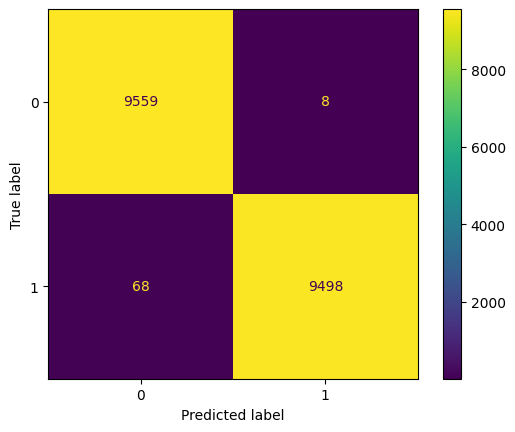

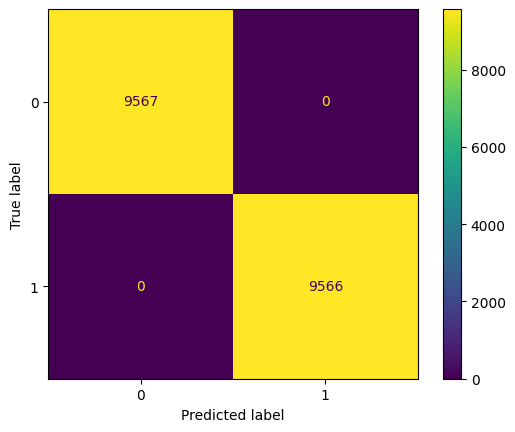

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, logistic_model.predict(X_test_scaled))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = confusion_matrix(y_test, random_forest_model.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

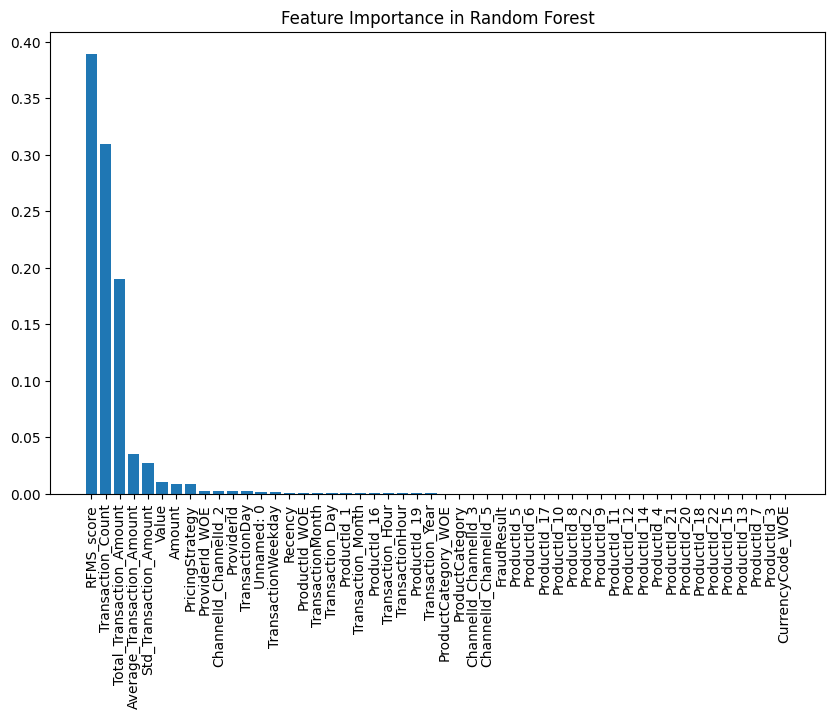

In [48]:
import matplotlib.pyplot as plt
import numpy as np

importance = random_forest_model.feature_importances_
indices = np.argsort(importance)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance in Random Forest")
plt.bar(range(X_train.shape[1]), importance[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.show()